# Import Libraries

In [1]:
import keras
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Preprocessing Data

Source: https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv

Dataset features: 
- Categorical features: "Area", "Item", "Year"
- Continuous features: "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"
- Target: "hg/ha_yield"

## Import Data

In [2]:
df = pd.read_csv("data.csv")
cat_cols = ["Area", "Item"]
cont_cols = ["average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]
target_col = "hg/ha_yield"

df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


## Data Cleaning

In [3]:
# drop columns that has no meaning
df.drop(columns=['Unnamed: 0', 'Year'], axis='columns',inplace=True)
df.head()

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,1485.0,121.0,16.37
1,Albania,Potatoes,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",23333,1485.0,121.0,16.37
3,Albania,Sorghum,12500,1485.0,121.0,16.37
4,Albania,Soybeans,7000,1485.0,121.0,16.37


In [4]:
df.isna().sum()

Area                             0
Item                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

## Splitting Training and Test Set

In [5]:
X = df.drop(columns=[target_col])
y = df[target_col].values.reshape(-1, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=766)

## Encoding Categorical Features

In [7]:
item_encoder = ce.OneHotEncoder(
    cols='Item',
    handle_unknown='return_nan',
    return_df=True,
    use_cat_names=True
)
X_train = item_encoder.fit_transform(X_train)
X_test = item_encoder.transform(X_test)

In [8]:
X_train

,Area,Item_Potatoes,Item_Wheat,Item_Plantains and others,Item_Yams,Item_Maize,Item_Cassava,Item_Sorghum,Item_Sweet potatoes,"Item_Rice, paddy",Item_Soybeans,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21434,Nicaragua,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2280.0,6889.26,27.35
25470,Spain,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636.0,40727.00,12.52
945,Australia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534.0,23899.00,17.42
17463,Kenya,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.0,6344.00,16.44
16724,Japan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.0,70262.54,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,118930.56,24.78
4768,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,367778.00,27.71
26253,Tajikistan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,691.0,247.90,8.69
23786,Qatar,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,74.0,68.00,27.92


In [9]:
area_encoder = ce.BaseNEncoder(
    cols='Area',
    base=3,
    handle_unknown='return_nan',
    return_df=True,
)
X_train = area_encoder.fit_transform(X_train)
X_test = area_encoder.transform(X_test)

In [10]:
X_train

,Area_0,Area_1,Area_2,Area_3,Area_4,Item_Potatoes,Item_Wheat,Item_Plantains and others,Item_Yams,Item_Maize,Item_Cassava,Item_Sorghum,Item_Sweet potatoes,"Item_Rice, paddy",Item_Soybeans,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21434,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2280.0,6889.26,27.35
25470,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636.0,40727.00,12.52
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534.0,23899.00,17.42
17463,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.0,6344.00,16.44
16724,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.0,70262.54,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,118930.56,24.78
4768,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,367778.00,27.71
26253,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,691.0,247.90,8.69
23786,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,74.0,68.00,27.92


In [11]:
X_train.shape

(22593, 18)

In [12]:
X_train.corr()

,Area_0,Area_1,Area_2,Area_3,Area_4,Item_Potatoes,Item_Wheat,Item_Plantains and others,Item_Yams,Item_Maize,Item_Cassava,Item_Sorghum,Item_Sweet potatoes,"Item_Rice, paddy",Item_Soybeans,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area_0,1.000000,-0.177355,-0.119036,-0.009138,-0.040623,0.052354,0.071782,-0.017358,-0.009495,0.023937,-0.042775,-0.007638,-0.047050,-0.032368,-0.030519,-0.187975,-0.160156,-0.102554
Area_1,-0.177355,1.000000,-0.061769,0.029130,0.113405,0.022105,0.030191,0.070041,-0.024156,0.024535,-0.004848,0.006347,-0.035362,-0.024906,-0.045891,0.074217,-0.277388,-0.137627
Area_2,-0.119036,-0.061769,1.000000,-0.126279,-0.157695,-0.008270,-0.012391,0.001647,0.044973,-0.006985,0.055197,0.007334,-0.014972,-0.027011,-0.005271,0.100981,0.273069,0.171113
Area_3,-0.009138,0.029130,-0.126279,1.000000,-0.044654,0.024766,-0.016493,0.028347,0.056043,-0.026536,0.028323,-0.019050,-0.012830,0.004689,-0.020590,0.174662,0.004806,0.109561
Area_4,-0.040623,0.113405,-0.157695,-0.044654,1.000000,0.010411,0.040790,0.006190,-0.041465,0.022875,-0.102920,0.016477,-0.028174,-0.004369,0.037732,-0.233038,-0.236458,-0.257576
Item_Potatoes,0.052354,0.022105,-0.008270,0.024766,0.010411,1.000000,-0.168337,-0.060119,-0.074880,-0.174613,-0.118700,-0.146874,-0.141034,-0.155281,-0.151723,-0.053614,-0.034586,-0.098620
Item_Wheat,0.071782,0.030191,-0.012391,-0.016493,0.040790,-0.168337,1.000000,-0.056775,-0.070714,-0.164899,-0.112096,-0.138703,-0.133188,-0.146643,-0.143283,-0.110764,-0.012642,-0.156473
Item_Plantains and others,-0.017358,0.070041,0.001647,0.028347,0.006190,-0.060119,-0.056775,1.000000,-0.025255,-0.058891,-0.040034,-0.049536,-0.047567,-0.052372,-0.051172,0.140193,-0.070127,0.085172
Item_Yams,-0.009495,-0.024156,0.044973,0.056043,-0.041465,-0.074880,-0.070714,-0.025255,1.000000,-0.073351,-0.049863,-0.061698,-0.059245,-0.065230,-0.063736,0.124455,0.107397,0.062092
Item_Maize,0.023937,0.024535,-0.006985,-0.026536,0.022875,-0.174613,-0.164899,-0.058891,-0.073351,1.000000,-0.116276,-0.143874,-0.138154,-0.152110,-0.148625,-0.032605,-0.026889,-0.043180


## Transform Data

In [13]:
ss_x = StandardScaler()
X_train = ss_x.fit_transform(X_train)
X_test = ss_x.transform(X_test)

ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

In [14]:
X_train

array([[-0.27158931, -0.65302538, -1.29127055, ...,  1.59081483,
        -0.50306731,  1.07952211],
       [-0.27158931, -0.65302538, -1.29127055, ..., -0.72453517,
         0.06101976, -1.27084462],
       [-0.27158931, -0.65302538, -1.29127055, ..., -0.86818827,
        -0.21950894, -0.49425683],
       ...,
       [-0.27158931,  2.02437275, -1.29127055, ..., -0.64707516,
        -0.61378113, -1.877851  ],
       [ 3.68203006, -0.65302538,  1.25209509, ..., -1.5160356 ,
        -0.61678012,  1.16985987],
       [-0.27158931, -0.65302538, -0.01958773, ..., -0.09499658,
         0.13154402,  0.7625475 ]])

## Principal Component Analysis

In [15]:
pca = PCA(0.9)

pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

len(pca_X_train[0])

14

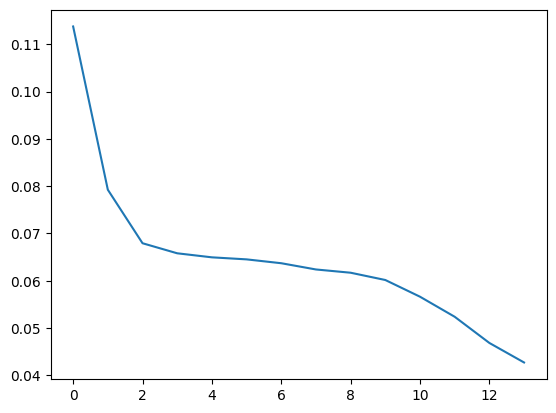

In [16]:
plt.plot(pca.explained_variance_ratio_)

# Model Selection

In [17]:
metrics = {}

## Machine Learning

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR

In [19]:
reg1 = LinearRegression()
reg1.fit(pca_X_train, y_train.ravel())
reg2 = DecisionTreeRegressor()
reg2.fit(pca_X_train, y_train.ravel())
reg3 = RandomForestRegressor(n_estimators=100)
reg3.fit(pca_X_train, y_train.ravel())
reg4 = SVR(kernel = 'rbf')
reg4.fit(pca_X_train, y_train.ravel())

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(pca_X_train)
reg5 = LinearRegression()
reg5.fit(X_poly, y_train.ravel())

LinearRegression()

In [20]:
reg6 = BaggingRegressor(n_estimators=100)
reg6.fit(pca_X_train, y_train.ravel())

BaggingRegressor(n_estimators=100)

In [21]:
y_pred1 = reg1.predict(pca_X_test).reshape(-1, 1)
y_pred2 = reg2.predict(pca_X_test).reshape(-1, 1)
y_pred3 = reg3.predict(pca_X_test).reshape(-1, 1)
y_pred4 = reg4.predict(pca_X_test).reshape(-1, 1)
y_pred5 = reg5.predict(poly_reg.transform(pca_X_test)).reshape(-1, 1)
y_pred6 = reg6.predict(pca_X_test).reshape(-1, 1)

In [22]:
y_test_unscaled = ss_y.inverse_transform(y_test)
pred1 = ss_y.inverse_transform(y_pred1)
pred2 = ss_y.inverse_transform(y_pred2)
pred3 = ss_y.inverse_transform(y_pred3)
pred4 = ss_y.inverse_transform(y_pred4)
pred5 = ss_y.inverse_transform(y_pred5)
pred6 = ss_y.inverse_transform(y_pred6)

metrics['Linear Regression'] = {
    'MSE': mean_squared_error(y_test_unscaled, pred1),
    'RMSE': root_mean_squared_error(y_test_unscaled, pred1),
    'MAE': mean_absolute_error(y_test_unscaled, pred1),
    'R2': r2_score(y_test_unscaled, pred1)
}

metrics['Decision Tree'] = {
    'MSE': mean_squared_error(y_test_unscaled, pred2),
    'RMSE': root_mean_squared_error(y_test_unscaled, pred2),
    'MAE': mean_absolute_error(y_test_unscaled, pred2),
    'R2': r2_score(y_test_unscaled, pred2)
}

metrics['Random Forest'] = {
    'MSE': mean_squared_error(y_test_unscaled, pred3),
    'RMSE': root_mean_squared_error(y_test_unscaled, pred3),
    'MAE': mean_absolute_error(y_test_unscaled, pred3),
    'R2': r2_score(y_test_unscaled, pred3)
}

metrics['SVR'] = {
    'MSE': mean_squared_error(y_test_unscaled, pred4),
    'RMSE': root_mean_squared_error(y_test_unscaled, pred4),
    'MAE': mean_absolute_error(y_test_unscaled, pred4),
    'R2': r2_score(y_test_unscaled, pred4)
}

metrics['Polynomial Regression'] = {
    'MSE': mean_squared_error(y_test_unscaled, pred5),
    'RMSE': root_mean_squared_error(y_test_unscaled, pred5),
    'MAE': mean_absolute_error(y_test_unscaled, pred5),
    'R2': r2_score(y_test_unscaled, pred5)
}

metrics['Bagging Regressor'] = {
    'MSE': mean_squared_error(y_test_unscaled, pred6),
    'RMSE': root_mean_squared_error(y_test_unscaled, pred6),
    'MAE': mean_absolute_error(y_test_unscaled, pred6),
    'R2': r2_score(y_test_unscaled, pred6)
}

## Deep Learning

### Multilayer Perceptron (MLP)

In [25]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [27]:
mlp_model = keras.Sequential(
    [
        keras.Input(shape=(len(X_train[0]),)),
        keras.layers.Dropout(0.05),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.05),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.05),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.05),
        keras.layers.Dense(1, activation='linear')
    ]
)

In [28]:
mlp_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae', 'mse']
)
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,265 (106.50 KB)

 Trainable params: 27,265 (106.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
mlp_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4007 - mae: 0.4037 - mse: 0.4007 - val_loss: 0.1608 - val_mae: 0.2319 - val_mse: 0.1608
Epoch 2/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1929 - mae: 0.2721 - mse: 0.1929 - val_loss: 0.1352 - val_mae: 0.2225 - val_mse: 0.1352
Epoch 3/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1728 - mae: 0.2531 - mse: 0.1728 - val_loss: 0.1135 - val_mae: 0.2001 - val_mse: 0.1135
Epoch 4/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1565 - mae: 0.2440 - mse: 0.1565 - val_loss: 0.0957 - val_mae: 0.1882 - val_mse: 0.0957
Epoch 5/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1487 - mae: 0.2319 - mse: 0.1487 - val_loss: 0.0838 - val_mae: 0.1733 - val_mse: 0.0838
Epoch 6/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1403 - mae: 0.2260 - mse: 0.1403 - val_loss: 0.0789 - val_mae: 0.1611 - val_mse: 0.0789
Epoch 7/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1278 - mae: 0.2179 - mse: 0.127

In [30]:
preds = mlp_model.predict(X_test)
y_test_unscaled = ss_y.inverse_transform(y_test)
preds = ss_y.inverse_transform(preds)

metrics['MLP'] = {
    'MSE': mean_squared_error(y_test_unscaled, preds),
    'RMSE': root_mean_squared_error(y_test_unscaled, preds),
    'MAE': mean_absolute_error(y_test_unscaled, preds),
    'R2': r2_score(y_test_unscaled, preds)
}

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


### TabNet Regressor

In [32]:
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

tabnet_reg = TabNetRegressor(
    optimizer_params=dict(lr=3e-2),
    scheduler_params={"step_size": 30, "gamma": 0.10},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    n_d=24,
    n_a=24,
    n_steps=30,
    gamma=0.10,
    lambda_sparse=1e-5,
    seed=766,
    verbose=1,
)


c:\Users\dheoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [33]:
tabnet_reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['mse'],
    max_epochs=50,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

epoch 0  | loss: 8.38907 | train_mse: 0.26736 | valid_mse: 0.28072 |  0:00:22s
epoch 1  | loss: 0.19703 | train_mse: 0.23804 | valid_mse: 0.24747 |  0:00:48s
epoch 2  | loss: 0.12899 | train_mse: 0.11374 | valid_mse: 0.12223 |  0:01:10s
epoch 3  | loss: 0.0982  | train_mse: 0.07726 | valid_mse: 0.08492 |  0:01:33s
epoch 4  | loss: 0.08838 | train_mse: 0.06838 | valid_mse: 0.07744 |  0:01:56s
epoch 5  | loss: 0.07571 | train_mse: 0.05875 | valid_mse: 0.06636 |  0:02:18s
epoch 6  | loss: 0.07003 | train_mse: 0.05783 | valid_mse: 0.0665  |  0:02:41s
epoch 7  | loss: 0.0697  | train_mse: 0.05517 | valid_mse: 0.06251 |  0:03:04s
epoch 8  | loss: 0.06637 | train_mse: 0.0591  | valid_mse: 0.06415 |  0:03:28s
epoch 9  | loss: 0.06176 | train_mse: 0.05661 | valid_mse: 0.0658  |  0:03:50s
epoch 10 | loss: 0.06126 | train_mse: 0.05226 | valid_mse: 0.0579  |  0:04:13s
epoch 11 | loss: 0.0612  | train_mse: 0.05134 | valid_mse: 0.0583  |  0:04:35s
epoch 12 | loss: 0.06054 | train_mse: 0.06084 | vali

c:\Users\dheoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [36]:
preds = tabnet_reg.predict(X_test)
y_test_unscaled = ss_y.inverse_transform(y_test)
preds = ss_y.inverse_transform(preds)

metrics['TabNet'] = {
    'MSE': mean_squared_error(y_test_unscaled, preds),
    'RMSE': root_mean_squared_error(y_test_unscaled, preds),
    'MAE': mean_absolute_error(y_test_unscaled, preds),
    'R2': r2_score(y_test_unscaled, preds)
}

tabnet
R2 = 0.9576048496756998
MSE = 317191154.00337845
MAE = 8549.929656124807
RMSE = 17809.861144977476

mlp
R2 = 0.9455535352238054
MSE = 407356427.83808315
MAE = 10397.462190487255
RMSE = 20183.072804656953

### TabTransformer

In [54]:
from fastai.tabular.all import RegressionBlock, Learner, Categorify, TabularPandas
from tsai.models.TabTransformer import TabTransformer
from fastai.losses import MSELossFlat
from fastai.metrics import AccumMetric
import numpy as np

SEED = 766
np.random.seed(SEED)

In [55]:
def r2_score_metric(preds, true):
    preds = preds.squeeze()
    return r2_score(true.cpu().numpy(), preds.cpu().numpy())

def rmse_metric(preds, true):
    preds = preds.squeeze()
    return np.sqrt(mean_squared_error(true.cpu().numpy(), preds.cpu().numpy()))

def mae_metric(preds, true):
    preds = preds.squeeze()
    return mean_absolute_error(true.cpu().numpy(), preds.cpu().numpy())

# Register metrics
r2_metric = AccumMetric(r2_score_metric, flatten=False)
rmse_metric = AccumMetric(rmse_metric, flatten=False)
mae_metric = AccumMetric(mae_metric, flatten=False)

In [ ]:
# Load data
df = pd.read_csv('data.csv')
target_col = 'hg/ha_yield'
cat_names = ['Area', 'Item']
cont_names = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

for cat in cat_names:
    all_categories = df[cat].astype(str).unique().tolist() + ['unknown'] # Add 'unknown' for unknown categories
    df[cat] = pd.Categorical(df[cat], categories=all_categories)

classes = {cat: df[cat].cat.categories.tolist() for cat in cat_names}

train_set, valid_set = train_test_split(range(len(df)), test_size=0.2, random_state=SEED)
splits = (list(train_set), list(valid_set))

In [ ]:
# Create DataLoaders
procs = [Categorify]
config = TabularPandas(
    df, 
    procs=procs,
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=target_col,
    splits=splits,
    y_block=RegressionBlock()
)
dls = config.dataloaders(bs=64, seed=SEED)

model = TabTransformer(classes=classes, cont_names=cont_names, c_out=1, d_model=64)
learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=[r2_metric, rmse_metric, mae_metric])
learn.fit_one_cycle(20, 0.0003)

epoch,train_loss,valid_loss,r2_score_metric,rmse_metric,mae_metric,time
0,12992248832.000000,13557096448.000000,-0.812015,116434.953927,77944.382812,00:11
1,13250401280.000000,13348774912.000000,-0.784171,115536.889624,76599.851562,00:10
2,10707310592.000000,10789457920.000000,-0.442097,103872.295748,61673.046875,00:10
3,4450447360.000000,3928957952.000000,0.474863,62681.404451,31334.876953,00:10
4,1676207104.000000,1532703360.000000,0.795142,39149.757190,21703.683594,00:10
5,943201472.000000,807513152.000000,0.892069,28416.777016,17027.580078,00:11
6,617653184.000000,646079488.000000,0.913646,25418.091195,14826.043945,00:11
7,569560448.000000,581366080.000000,0.922296,24111.532842,14146.989258,00:11
8,533699232.000000,533432128.000000,0.928702,23096.148943,13424.875000,00:11
9,543924032.000000,535733760.000000,0.928395,23145.925948,13055.470703,00:12


In [56]:
metrics['TabTransformer'] = {
    'MSE': learn.recorder.final_record[1],
    'RMSE': learn.recorder.final_record[3],
    'MAE': learn.recorder.final_record[4],
    'R2': learn.recorder.final_record[2]
}

# Results

Best one is TabNet Regressor

In [59]:
df_results = pd.DataFrame(metrics).T
df_results = df_results.reset_index().rename(columns={'index': 'Model'})
df_results

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,2.681733e+09,51785.455596,32177.682148,0.641565
1,Decision Tree,5.160668e+08,22717.104478,8874.150027,0.931024
2,Random Forest,3.568644e+08,18890.853710,7999.454127,0.952302
3,SVR,9.470257e+08,30773.783118,15664.866213,0.873422
4,Polynomial Regression,3.672604e+08,19164.038085,9464.786474,0.950913
5,Bagging Regressor,3.585769e+08,18936.127676,7967.255763,0.952073
6,MLP,3.595240e+08,18961.119036,9563.158206,0.951947
7,TabNet,3.171912e+08,17809.861145,8549.929656,0.957605
8,TabTransformer,4.643701e+08,21549.247783,11804.132812,0.937933
